#**Model calculation: Rabi oscillations and quantum beats**



> This code supplements Figures 11 and 12b of the Chemical Reviews article titled "Coherence in Chemistry: Foundations and Frontiers" ([doi.org/10.1021/acs.chemrev.3c00643](https://doi.org/10.1021/acs.chemrev.3c00643))

To begin, press the play button beside each cell (proceed sequentially through the cells).

*Note: run either the "site 1" or "eigenstate 1" initial state cells and compare the calculated time evolution.*

In [ ]:
#@title Import libraries, prep plot settings

import matplotlib.pyplot as plt
import numpy as np
from math import *
import cmath
from scipy import linalg
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

hbar = 1

i_ = complex(0, 1)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<ipython-input-1-bde0f610da59>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [ ]:
#@title Tunable parameters

n = 1000                 # number of points
tmax = 8                 # max time value
E1 = 10
E2 = 10
V = 0.05*E1

In [ ]:
#@title Set up arrays

dt = tmax/n                # timestep
t = np.arange(0,tmax,dt)   # time vector

H = np.array([[E1, V], [V, E2]], dtype='complex')

eigval, eigvec = linalg.eigh(H)

In [ ]:
#@title Initial state = site 1, projection to sites

rho = np.array([[1, 0], [0, 0]], dtype='complex')
rho_eig = eigvec @ rho @ np.conjugate(eigvec.transpose())

Proj1 = np.array([[1, 0], [0, 0]], dtype='complex')
Proj2 = np.array([[0, 0], [0, 1]], dtype='complex')
# Proj1_eig = eigvec @ Proj1 @ np.conjugate(eigvec.transpose())
# Proj2_eig = eigvec @ Proj2 @ np.conjugate(eigvec.transpose())

Proj1_eig = np.conjugate(eigvec.transpose()) @ Proj1 @ eigvec
Proj2_eig = np.conjugate(eigvec.transpose()) @ Proj2 @ eigvec

In [ ]:
#@title Initial state = eigenstate 1, projection to sites

rho_eig = np.array([[1, 0], [0, 0]], dtype='complex')

Proj1 = np.array([[1, 0], [0, 0]], dtype='complex')
Proj2 = np.array([[0, 0], [0, 1]], dtype='complex')
Proj1_eig = eigvec @ Proj1 @ np.conjugate(eigvec.transpose())
Proj2_eig = eigvec @ Proj2 @ np.conjugate(eigvec.transpose())

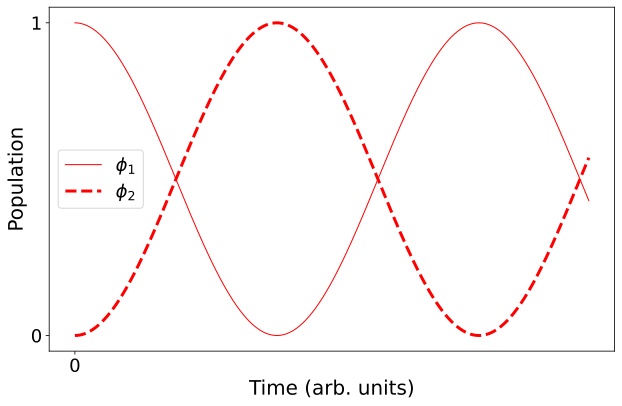

In [ ]:
#@title Calculate UNITARY time-evolution of density matrix

def U(tn):
  return linalg.expm(-i_*np.diag(eigval)*tn)

def Udag(tn):
  return np.transpose(np.conjugate(linalg.expm(-i_*np.diag(eigval)*tn)))

P1 = np.zeros((n,))
P2 = np.zeros((n,))
rho_store = []
test = np.zeros((n,))

for i in range(n):
   rho_time = U(t[i]) @ rho_eig.copy() @ Udag(t[i])     # Propagate the density matrix
   P1[i] = np.real(np.trace(rho_time @ Proj1_eig))  # Calculate the observable at time t
   P2[i] = np.real(np.trace(rho_time @ Proj2_eig))  # Calculate the observable at time t
   rho_store.append(rho_time)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,np.real(P1), 'r-', linewidth=1)
ax.plot(t,np.real(P2), 'r--', linewidth=3)
ax.xaxis.set_ticks([0])
ax.yaxis.set_ticks([0,1])
plt.xlabel("Time (arb. units)")
plt.ylabel("Population")
plt.legend(['$\phi_1$', '$\phi_2$'])
fig.tight_layout()
plt.savefig("output.svg")

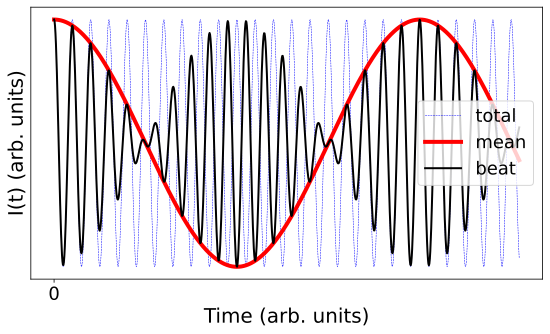

In [ ]:
#@title Calculate beats for driven 3LS

H3LS = np.array([[0, 0, 0], [0, E1, V], [0, V, E2]], dtype='complex')
eigval, eigvec = linalg.eigh(H3LS)

total_signal = 2*np.cos((eigval[2]+eigval[1])*t)*np.cos(abs(eigval[2]-eigval[1])*t)
average_signal = 2*np.cos((eigval[2]+eigval[1])*t)
beat_signal = 2*np.cos(abs(eigval[2]-eigval[1])*t)


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,average_signal, 'b--', label ="average", linewidth=0.5)
ax.plot(t,beat_signal, 'r', label ="beat", linewidth=4)
ax.plot(t,total_signal, 'k', label ="detected", linewidth=2)
ax.xaxis.set_ticks([0])
ax.yaxis.set_ticks([])
plt.xlabel("Time (arb. units)")
plt.ylabel("I(t) (arb. units)")
plt.legend(['total', 'mean', 'beat'],loc ="right")
fig.tight_layout()
plt.savefig("output.svg")